### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [7]:
coupons_Data = pd.read_csv('data/coupons.csv')

In [8]:
coupons_Data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [9]:
coupons_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

### Columns with missing observations

### 2. Investigate the dataset for missing or problematic data.



In [10]:
#columns with missing observations
missing_vals = coupons_Data.columns[coupons_Data.isnull().any()].values
total_missing_columns = np.count_nonzero(coupons_Data.isnull().sum())
print('Number of features with missing values: ', total_missing_columns, ' names of features: ', missing_vals)

Number of features with missing values:  6  names of features:  ['car' 'Bar' 'CoffeeHouse' 'CarryAway' 'RestaurantLessThan20'
 'Restaurant20To50']


In [380]:
#columns with number of missing observations
coupons_Data.isnull().sum().sort_values(ascending=False)

car                     12576
CoffeeHouse               217
Restaurant20To50          189
CarryAway                 151
RestaurantLessThan20      130
Bar                       107
destination                 0
passanger                   0
direction_opp               0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
occupation                  0
education                   0
has_children                0
maritalStatus               0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
Y                           0
dtype: int64

### Find % of the NaN's 



In [12]:
data_na_sum = coupons_Data.isnull().sum().sort_values(ascending=False)
data_na_sum[data_na_sum > 0]/len(coupons_Data) * 100

car                     99.148534
CoffeeHouse              1.710817
Restaurant20To50         1.490066
CarryAway                1.190476
RestaurantLessThan20     1.024913
Bar                      0.843582
dtype: float64

### 3. Decide what to do about your missing data --drop, replace, other...

### 3.1Dropping duplicate records and NaN's Columns

In [13]:
#drop the duplicated data
coupons_Data.drop_duplicates(keep=False,inplace=True)
#check for duplicated data - none
coupons_Data.duplicated().sum()

0

### 3.2 Find the % of the NaN's on each column



In [14]:
coupons_Data.isnull().sum().sort_values(ascending=False) * 100 /len(coupons_Data)

car                     99.138481
CoffeeHouse              1.731015
Restaurant20To50         1.507658
CarryAway                1.188577
RestaurantLessThan20     1.021059
Bar                      0.853542
destination              0.000000
passanger                0.000000
direction_opp            0.000000
direction_same           0.000000
toCoupon_GEQ25min        0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ5min         0.000000
income                   0.000000
occupation               0.000000
education                0.000000
has_children             0.000000
maritalStatus            0.000000
age                      0.000000
gender                   0.000000
expiration               0.000000
coupon                   0.000000
time                     0.000000
temperature              0.000000
weather                  0.000000
Y                        0.000000
dtype: float64

### 3.3 Drop the "car" column since it has more than 99% NaN 

In [15]:
#drop the "car" column from dataset
coupons_Data.drop('car',axis=1, inplace=True)


### 3.4 Drop NaN Records in below columns                                                             

CarryAway,  CoffeeHouse, RestaurantLessThan20 , Restaurant20To50, Bar 

These columns takes small percent of dataset

In [16]:
coupons_Data.dropna(subset=["CarryAway", "CoffeeHouse",\
                    "RestaurantLessThan20","Restaurant20To50","Bar"]\
            ,inplace=True)



### 3.5 Post Validation after dropping all NaN's and Car Column                                                              



In [17]:
#columns with number of missing observations
coupons_Data.isnull().sum().sort_values(ascending=False)

destination             0
income                  0
direction_opp           0
direction_same          0
toCoupon_GEQ25min       0
toCoupon_GEQ15min       0
toCoupon_GEQ5min        0
Restaurant20To50        0
RestaurantLessThan20    0
CarryAway               0
CoffeeHouse             0
Bar                     0
occupation              0
passanger               0
education               0
has_children            0
maritalStatus           0
age                     0
gender                  0
expiration              0
coupon                  0
time                    0
temperature             0
weather                 0
Y                       0
dtype: int64

### 3.6 Count of unique values in each column

In [18]:
#Count of distinct values on each columns in givne data
coupons_Data.nunique().sort_values(ascending=True)

toCoupon_GEQ5min         1
Y                        2
direction_same           2
toCoupon_GEQ25min        2
toCoupon_GEQ15min        2
direction_opp            2
expiration               2
gender                   2
has_children             2
destination              3
temperature              3
weather                  3
passanger                4
coupon                   5
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
time                     5
maritalStatus            5
education                6
age                      8
income                   9
occupation              25
dtype: int64

In [19]:
# Distinct values on each columns in givne data
for col in coupons_Data:
  print(coupons_Data[col].unique())

['No Urgent Place' 'Home' 'Work']
['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
['Sunny' 'Rainy' 'Snowy']
[55 80 30]
['2PM' '10AM' '6PM' '7AM' '10PM']
['Restaurant(<20)' 'Coffee House' 'Bar' 'Carry out & Take away'
 'Restaurant(20-50)']
['1d' '2h']
['Male' 'Female']
['21' '46' '26' '31' '41' '50plus' '36' 'below21']
['Single' 'Married partner' 'Unmarried partner' 'Divorced' 'Widowed']
[0 1]
['Bachelors degree' 'Some college - no degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
['Architecture & Engineering' 'Student' 'Education&Training&Library'
 'Unemployed' 'Healthcare Support' 'Healthcare Practitioners & Technical'
 'Sales & Related' 'Management' 'Arts Design Entertainment Sports & Media'
 'Computer & Mathematical' 'Life Physical Social Science'
 'Personal Care & Service' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Community & Social Services' 'Installation Maintenance & Repair'
 'Trans


### 4. What proportion of the total observations chose to accept the coupon? 



In [20]:
coupons_Data["Y"].value_counts(normalize=True)

1    0.567491
0    0.432509
Name: Y, dtype: float64

<AxesSubplot:title={'center':'How much percentage of customers accept the coupon (Green) vs Not Accept (Red)?'}, ylabel='Y'>

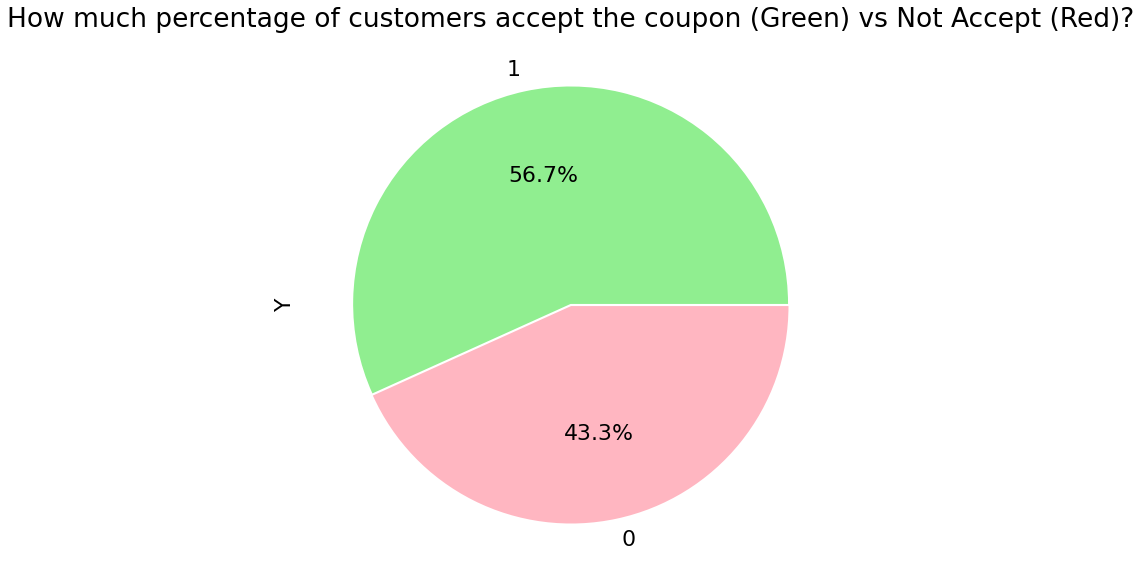

In [23]:
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 22})
plt.title("How much percentage of customers accept the coupon (Green) vs Not Accept (Red)?")
coupons_Data["Y"].value_counts().plot(kind = 'pie', explode = [0.005, 0.005], 
                             autopct="%0.1f%%",colors = ['lightgreen','lightpink'])

### 4.1 Checking on different categories - How the coupons accptane rario?

### 5 . Use a bar plot to visualize the `coupon` column.


Text(0.5, 1.0, 'Bar plot to visualize the coupon column')

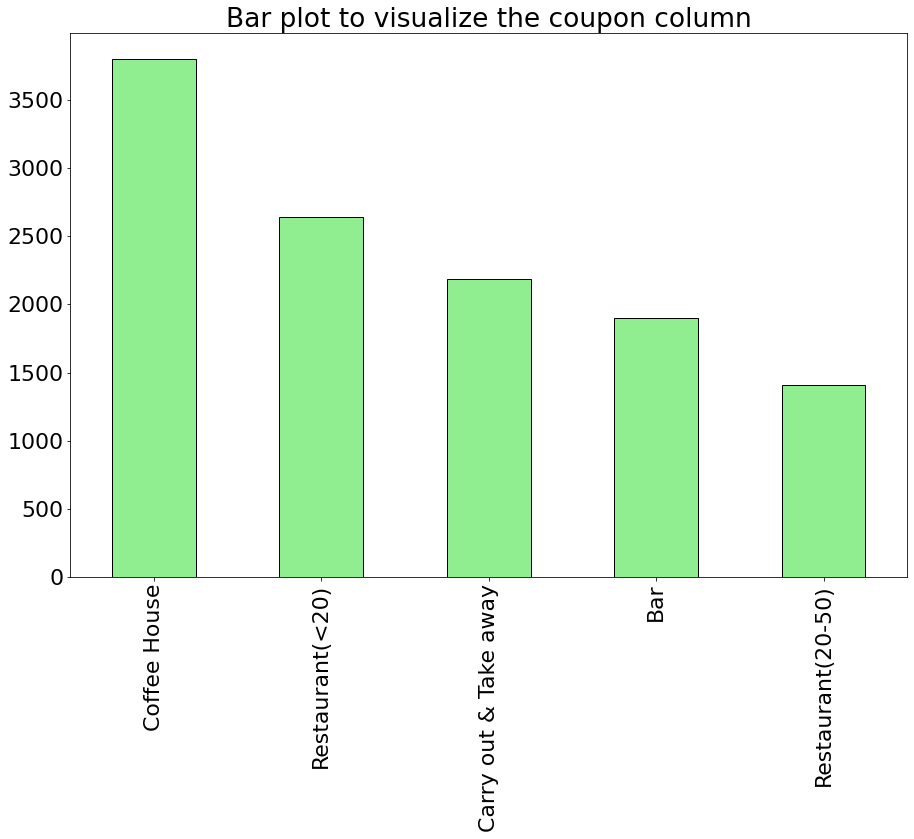

In [25]:
plt.figure(figsize=(15,10))
coupons_Data['coupon'].value_counts().plot(kind='bar', color ='lightgreen',edgecolor ='black')
plt.title("Bar plot to visualize the coupon column")


### 6 . Use a histogram to visualize the temperature column.

array([[<AxesSubplot:title={'center':'temperature'}>]], dtype=object)

<Figure size 1440x576 with 0 Axes>

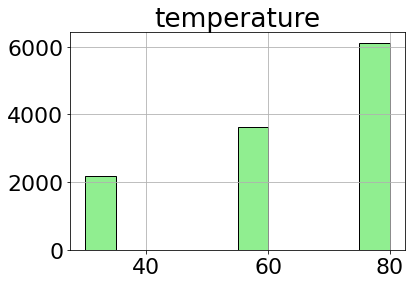

In [39]:
plt.figure(figsize=(20,8))
coupons_Data.hist(column='temperature',bins = 10,color ='lightgreen',edgecolor ='black')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

### 1. Create a new `DataFrame` that contains just the bar coupons.



In [41]:
data_bar = coupons_Data.loc[coupons_Data['coupon'] == "Bar"] 
data_bar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


/Users/thennarasuanbazhagan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Bar Coupon and Number of Acceptance'}, xlabel='Bar', ylabel='count'>

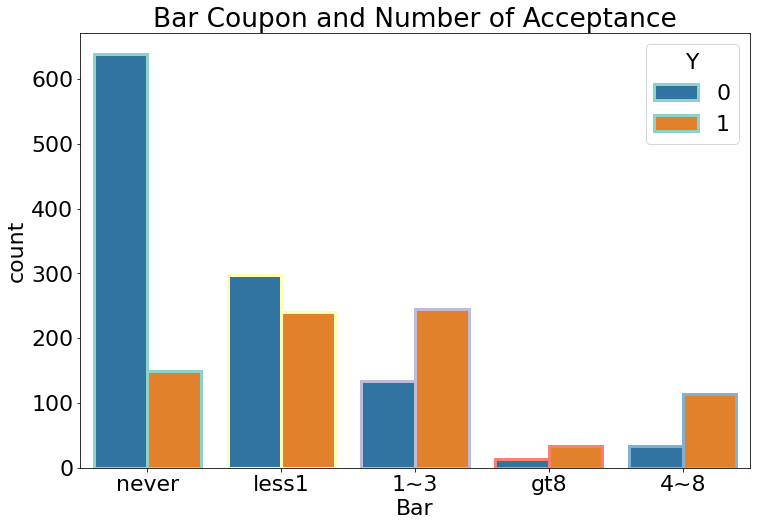

In [42]:
plt.figure(figsize=(12,8))
plt.title("Bar Coupon and Number of Acceptance")
sns.countplot("Bar",hue="Y", data = data_bar,
                   linewidth=3,
                   edgecolor=sns.color_palette("Set3"))


### 2. What proportion of bar coupons were accepted?


In [43]:
data_bar["Y"].value_counts(normalize=True)

0    0.588204
1    0.411796
Name: Y, dtype: float64

<AxesSubplot:title={'center':"Proportion of  'Bar' coupons were accepted ?"}, ylabel='Y'>

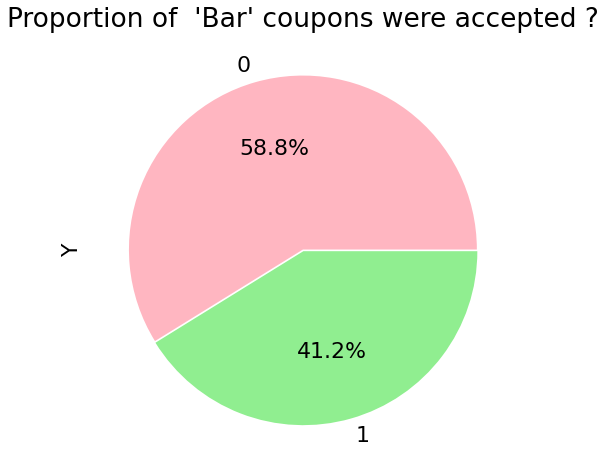

In [450]:
plt.rcParams.update({'font.size': 22})
plt.title("Proportion of  'Bar' coupons were accepted ?")
data_bar["Y"].value_counts().plot(kind = 'pie', explode = [0.005, 0.005], 
                             autopct="%0.1f%%",colors = ['lightpink','lightgreen'])

### 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


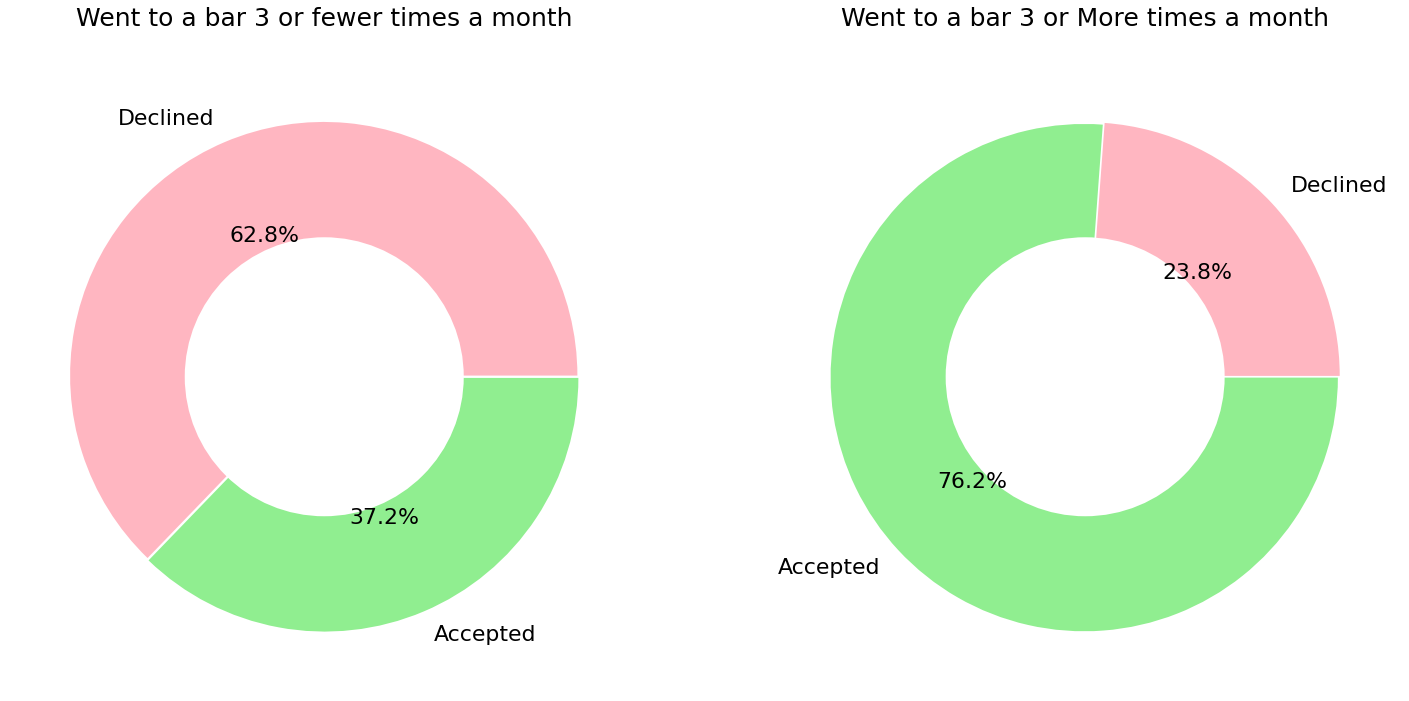

In [44]:
#Apply the filter to get only 3orLess BAR visits - bar_visit_ThreeorLess
#Apply the filter to get only 4orMore BAR visits - bar_visit_FourOrMore
plt.figure(figsize=(25,20))
plt.subplot(121)
bar_visit_ThreeorLess = data_bar[data_bar['Bar'].str.contains('less1') | data_bar['Bar'].str.contains('never')
                                 | data_bar['Bar'].str.contains('1~3')]['Y'].value_counts().sort_index().plot(kind = 'pie', explode = [0.005, 0.005],autopct="%0.1f%%",colors = ['lightpink','lightgreen'],labels=['Declined','Accepted'], fontsize=22)
plt.ylabel("")
plt.title('Went to a bar 3 or fewer times a month\n', fontsize=25)

# draw circle
centre_circle = plt.Circle((0, 0), 0.55, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.subplot(122)
bar_visit_ThreeorMore = data_bar[data_bar['Bar'].str.contains('gt8') | data_bar['Bar'].str.contains('4~8')]['Y'].value_counts().sort_index().plot(kind = 'pie', explode = [0.005, 0.005],autopct="%0.1f%%",colors = ['lightpink','lightgreen'],labels=['Declined','Accepted'], fontsize=22)
plt.ylabel("")
plt.title('Went to a bar 3 or More times a month\n', fontsize=25)

# draw circle
centre_circle = plt.Circle((0, 0), 0.55, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

/Users/thennarasuanbazhagan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/thennarasuanbazhagan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Bar_visit_FourOrMore vs Acceptance'}, xlabel='Bar', ylabel='count'>

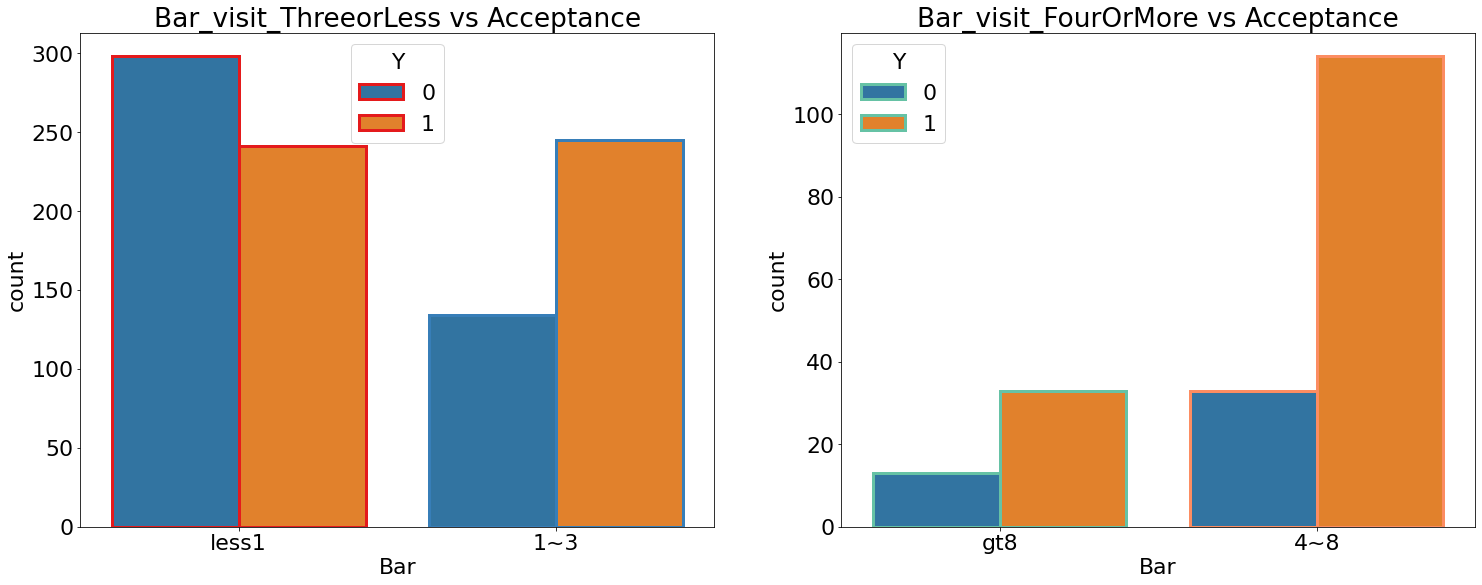

In [485]:
#Plots to show Acceptance between "Bar_visit_ThreeorLess VS Bar_visit_FourOrMore"
bar_visit_ThreeorLess = data_bar[data_bar['Bar'].str.contains('less1') | data_bar['Bar'].str.contains('1~3')]
bar_visit_FourOrMore = data_bar[data_bar['Bar'].str.contains('4~8') | data_bar['Bar'].str.contains('gt8')]

plt.figure(figsize=(25,20))
plt.subplot(221)
plt.title("Bar_visit_ThreeorLess vs Acceptance")
sns.countplot("Bar",hue="Y", data = bar_visit_ThreeorLess,
                   linewidth=3,
                   edgecolor=sns.color_palette("Set1"))
plt.subplot(222)
plt.title("Bar_visit_FourOrMore vs Acceptance")
sns.countplot("Bar",hue="Y", data = bar_visit_FourOrMore,
                   linewidth=3,
                   edgecolor=sns.color_palette("Set2"))


### 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

Check DataFrame and confirm 'BAR' Visits and Ages
['26' '31' '50plus' '41' '36' '46' 'below21']
['1~3' 'gt8' '4~8']


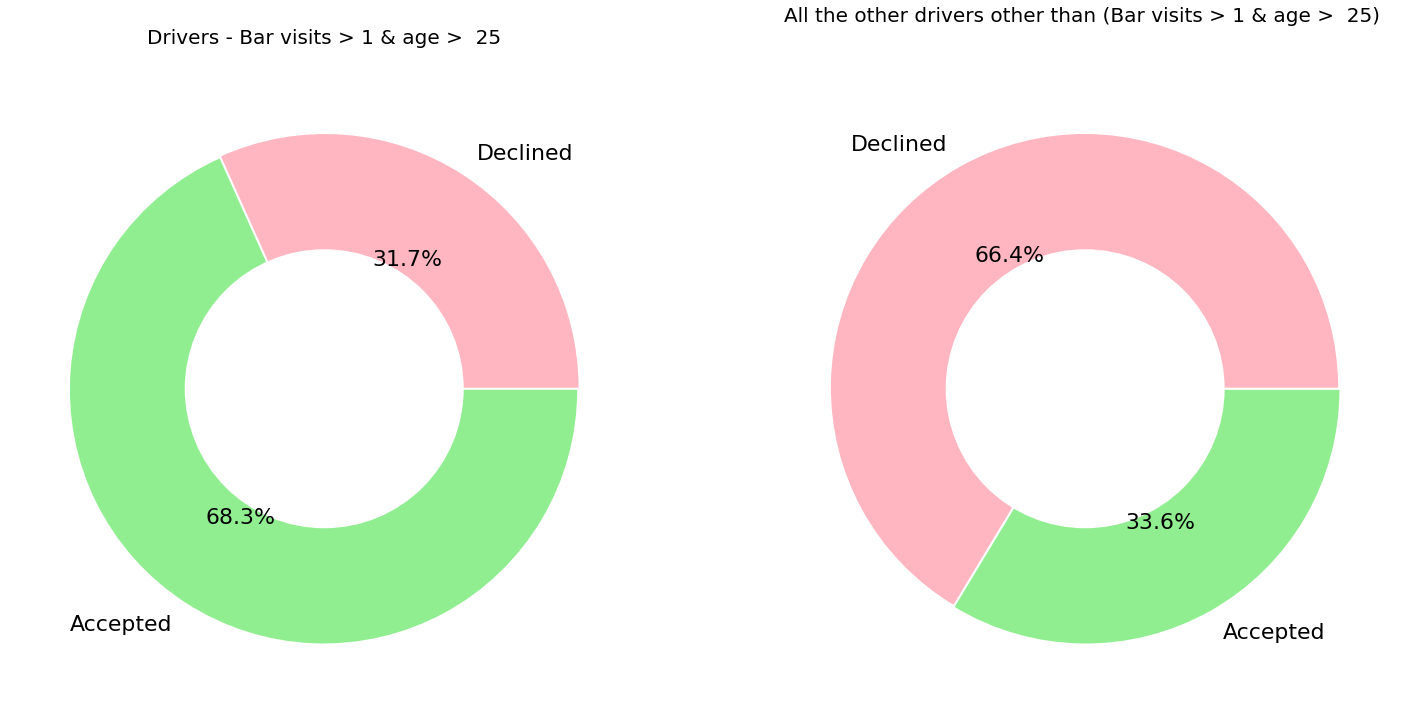

In [47]:
#Find the DRIVERS(All occupation Nearly 25 different occupations we have in our DF) who go to BAR more than once
plt.figure(figsize=(25,20))
MoreThanOnce_ToBar = data_bar[data_bar['Bar'].isin(['1~3','4~8','gt8'])]

#Find the drivers who go to BAR more than once and their AGE is Greater than 25
MoreThanOnce_ToBar_AgeGt25 = MoreThanOnce_ToBar[MoreThanOnce_ToBar['age'] > '25']

print("Check DataFrame and confirm 'BAR' Visits and Ages")
print(MoreThanOnce_ToBar_AgeGt25['age'].unique())
print(MoreThanOnce_ToBar_AgeGt25['Bar'].unique())
#Find the Acceptane 
plt.subplot(121)
MoreThanOnce_ToBar_AgeGt25_Acceptance = MoreThanOnce_ToBar_AgeGt25['Y'].value_counts().sort_index().plot(kind = 'pie', explode = [0.005, 0.005],autopct="%0.1f%%",colors = ['lightpink','lightgreen'],labels=['Declined','Accepted'], fontsize=22)
plt.ylabel("")
plt.title('Drivers - Bar visits > 1 & age >  25\n', fontsize=20)

# draw circle
centre_circle = plt.Circle((0, 0), 0.55, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.subplot(122)

data_bar[~((data_bar['Bar'].isin(['1~3', 'gt8', '4~8'])) & 
              (data_bar['age'] > '25'))]['Y'].value_counts().sort_index().plot(kind = 'pie', explode = [0.005, 0.005],autopct="%0.1f%%",colors = ['lightpink','lightgreen'],labels=['Declined','Accepted'], fontsize=22)
plt.ylabel("")
plt.title('All the other drivers other than (Bar visits > 1 & age >  25) \n\n', fontsize=20)


# draw circle
centre_circle = plt.Circle((0, 0), 0.55, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)


### 5. Use the same process to compare the acceptance rate between drivers 
### who go to bars more than once a month (and)
### Had passengers that were not a kid (and)
### Had occupations other than farming, fishing, or forestry. 

In [502]:
#Find the passanger details 
MoreThanOnce_ToBar['passanger'].value_counts()

Alone        341
Friend(s)    116
Partner       73
Kid(s)        42
Name: passanger, dtype: int64

In [504]:
#Find the occupation details 
MoreThanOnce_ToBar['occupation'].value_counts()

Unemployed                                   73
Student                                      66
Sales & Related                              64
Computer & Mathematical                      57
Management                                   48
Office & Administrative Support              40
Business & Financial                         28
Arts Design Entertainment Sports & Media     23
Education&Training&Library                   21
Healthcare Practitioners & Technical         18
Legal                                        17
Protective Service                           15
Food Preparation & Serving Related           15
Transportation & Material Moving             13
Installation Maintenance & Repair            11
Personal Care & Service                      11
Healthcare Support                           11
Production Occupations                       10
Construction & Extraction                     7
Architecture & Engineering                    6
Community & Social Services             

In [506]:
# Create the DF with No Kids and No occupations - farming , fishing and forestry

MoreThanOnce_ToBar = data_bar[data_bar['Bar'].isin(['1~3','4~8','gt8'])]
MoreThanOnce_ToBar_NoKids = MoreThanOnce_ToBar[~(MoreThanOnce_ToBar['passanger'].str.contains('Kid\(s\)'))]
MoreThanOnce_ToBar_NoKids_Nofff = MoreThanOnce_ToBar_NoKids[~(MoreThanOnce_ToBar_NoKids['occupation'].str.contains('farming') | MoreThanOnce_ToBar_NoKids['occupation'].str.contains('fishing') | MoreThanOnce_ToBar_NoKids['occupation'].str.contains('forestry') )]
MoreThanOnce_ToBar_NoKids_Nofff_Acceptance = MoreThanOnce_ToBar_NoKids_Nofff['Y'].sum()/len(MoreThanOnce_ToBar_NoKids_Nofff)

# 1 MINUS MoreThanOnce_ToBar_NoKids_Nofff_Acceptance to find Others Acceptance .

OthersAccpetances = 1- MoreThanOnce_ToBar_NoKids_Nofff_Acceptance

print(MoreThanOnce_ToBar_NoKids_Nofff_Acceptance)
print(OthersAccpetances)

0.7094339622641509
0.2905660377358491


/Users/thennarasuanbazhagan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/thennarasuanbazhagan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'MoreThanOnce_ToBar_NoKids vs Acceptance'}, xlabel='passanger', ylabel='count'>

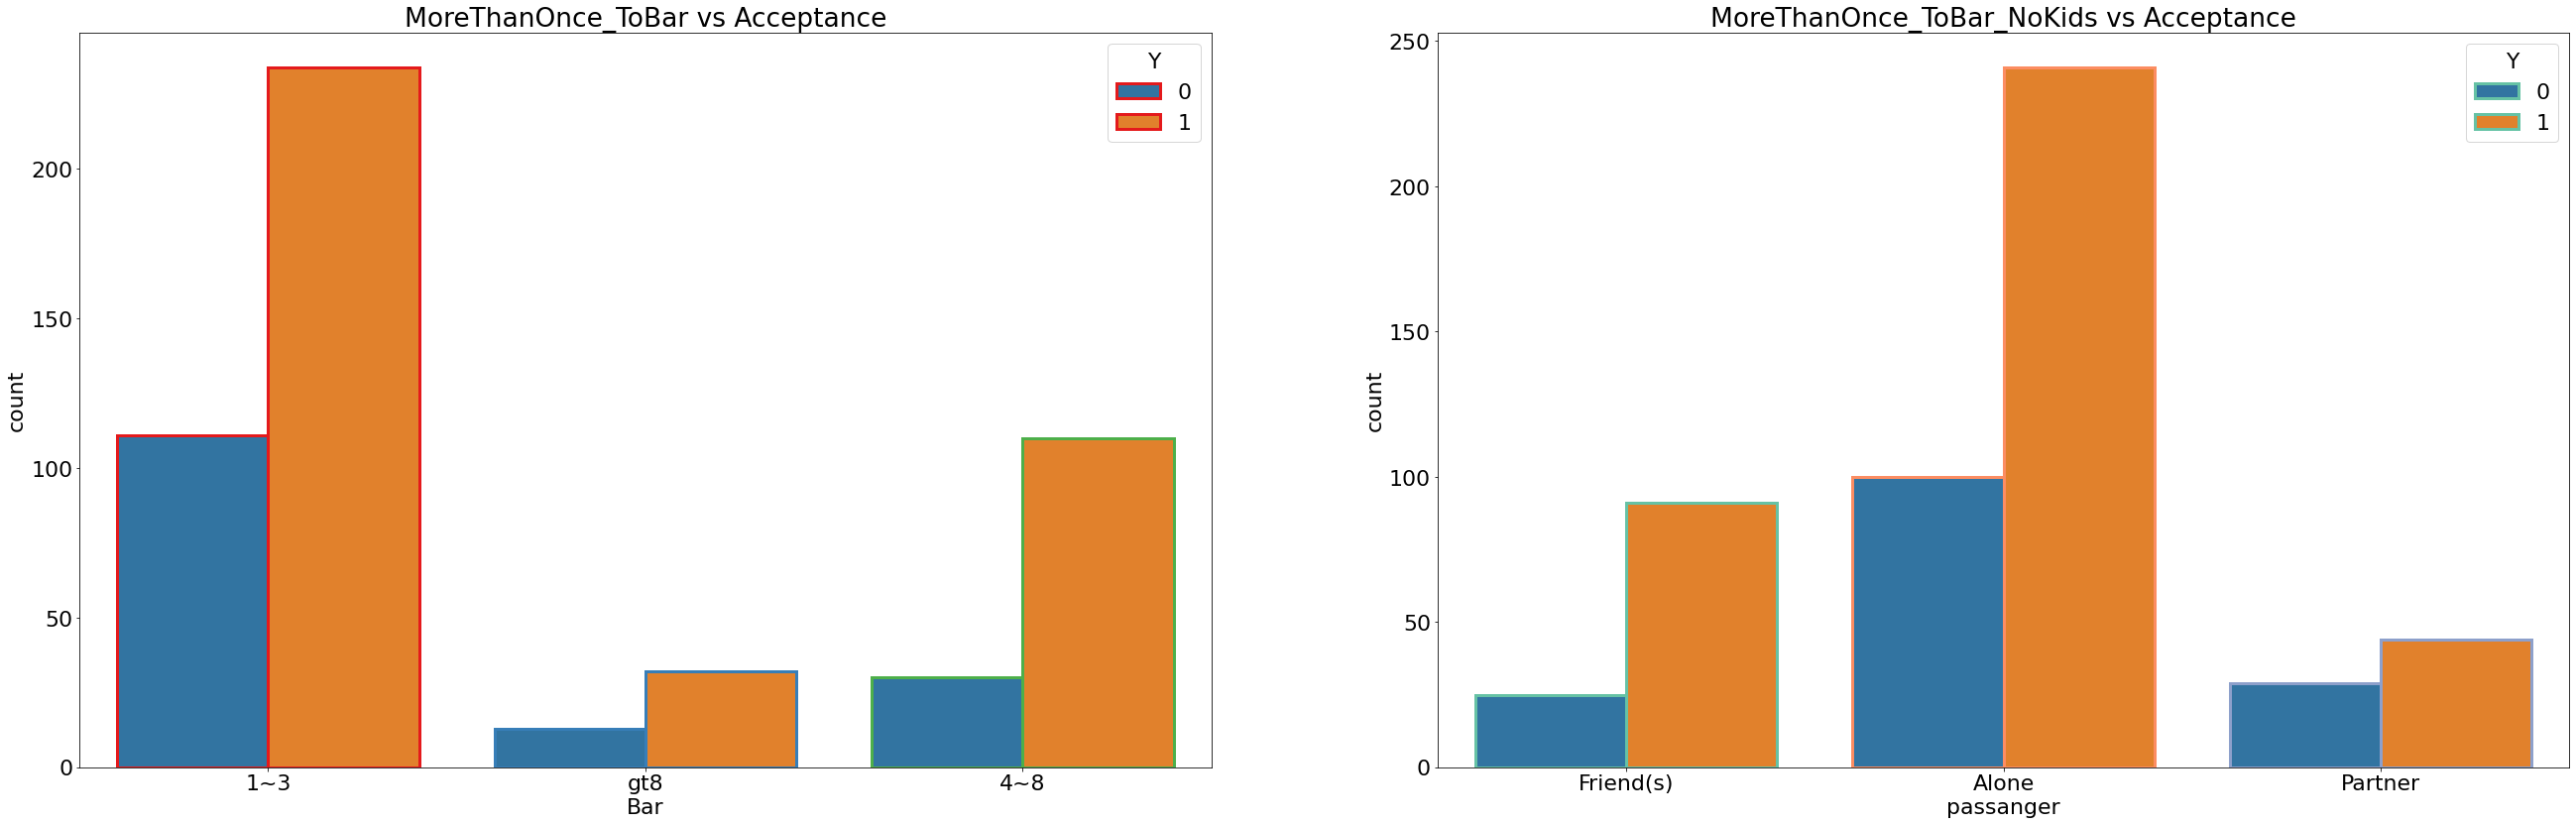

In [540]:
#Plots to show Acceptance between "MoreThanOnce_ToBar VS MoreThanOnce_ToBar_NoKids VS MoreThanOnce_ToBar_NoKids_Nofarming_fishing_forestry"
MoreThanOnce_ToBar = data_bar[data_bar['Bar'].isin(['1~3','4~8','gt8'])]
MoreThanOnce_ToBar_NoKids = MoreThanOnce_ToBar[~(MoreThanOnce_ToBar['passanger'].str.contains('Kid\(s\)'))]
MoreThanOnce_ToBar_NoKids_Nofff = MoreThanOnce_ToBar_NoKids[~(MoreThanOnce_ToBar_NoKids['occupation'].str.contains('farming') | MoreThanOnce_ToBar_NoKids['occupation'].str.contains('fishing') | MoreThanOnce_ToBar_NoKids['occupation'].str.contains('forestry') )]

plt.figure(figsize=(45,30))
plt.subplot(221)
plt.title("MoreThanOnce_ToBar vs Acceptance")
sns.countplot("Bar",hue="Y", data = MoreThanOnce_ToBar_NoKids_Nofff,
                   linewidth=3,
                   edgecolor=sns.color_palette("Set1"))
plt.subplot(222)
plt.title("MoreThanOnce_ToBar_NoKids vs Acceptance")
sns.countplot("passanger",hue="Y", data = MoreThanOnce_ToBar_NoKids_Nofff,
                   linewidth=3,
                   edgecolor=sns.color_palette("Set2"))


/Users/thennarasuanbazhagan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'MoreThanOnce_ToBar_NoKids_Nofarming_fishing_forestry(Occupational) vs Acceptance'}, xlabel='occupation', ylabel='count'>

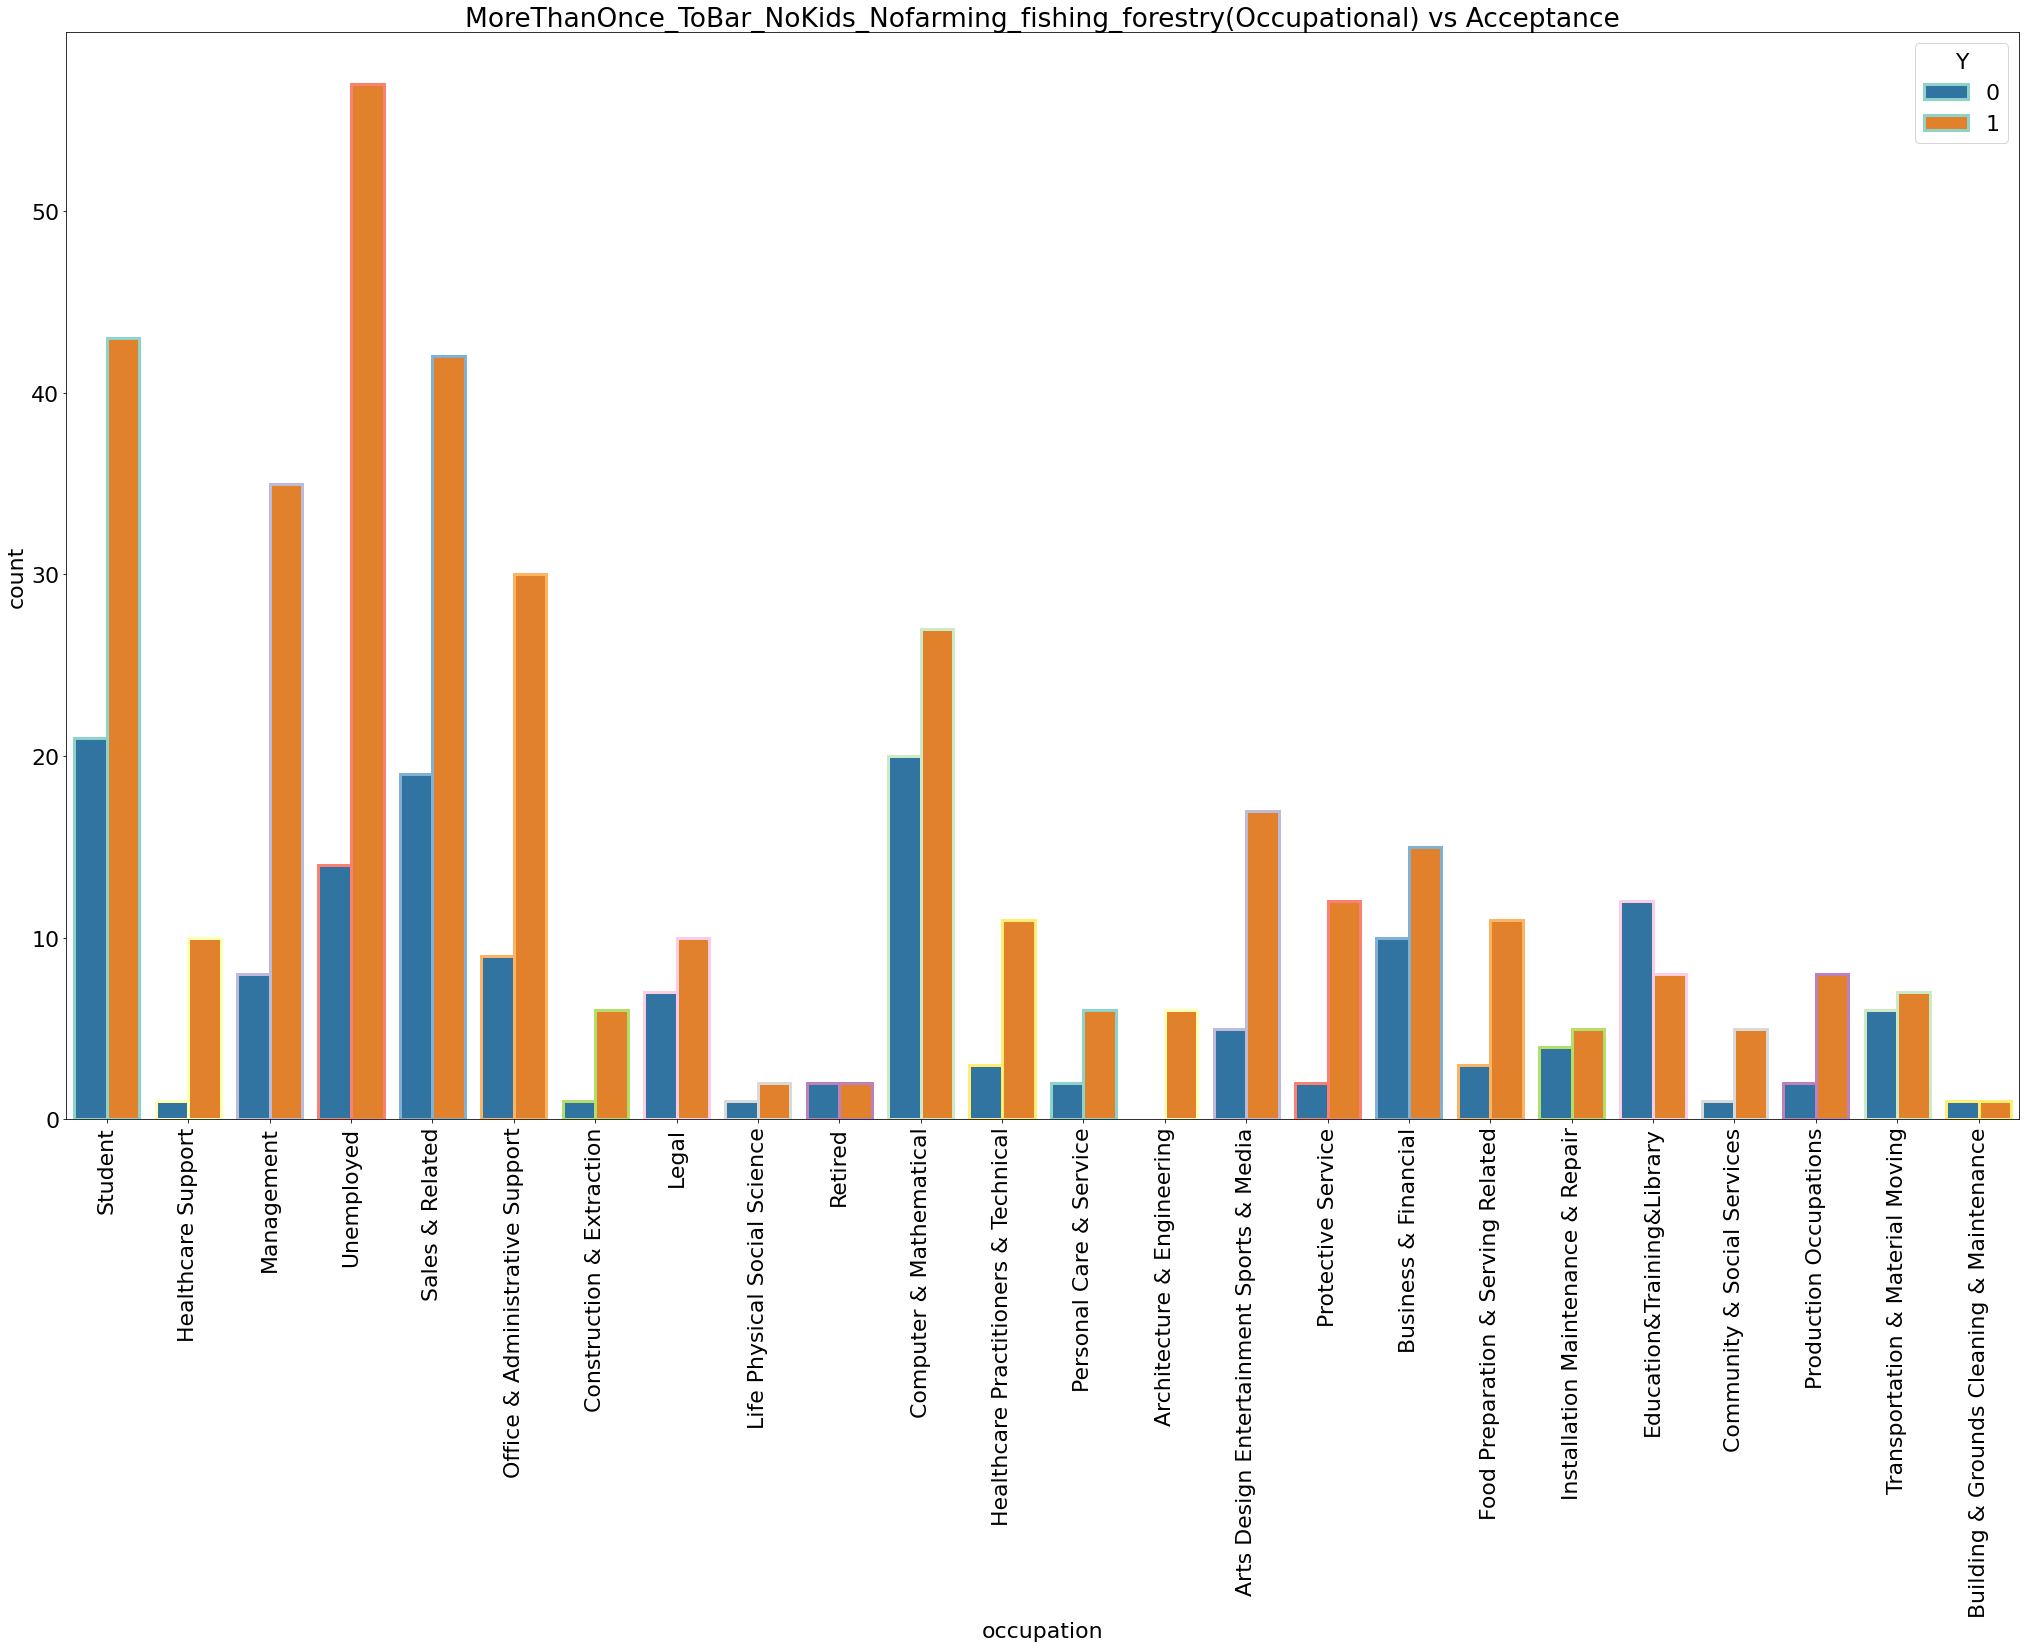

In [541]:
#Plots to show MoreThanOnce_ToBar_NoKids_Nofarming_fishing_forest VS Acceptance
plt.figure(figsize=(35,20))
plt.xticks(rotation = 90)
plt.title("MoreThanOnce_ToBar_NoKids_Nofarming_fishing_forestry(Occupational) vs Acceptance")
sns.countplot("occupation",hue="Y", data = MoreThanOnce_ToBar_NoKids_Nofff,
                   linewidth=3,
                   edgecolor=sns.color_palette("Set3"))

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [573]:
# DF For ===> go to bars more than once a month, had passengers that were not a kid, and were not widowed 
MoreThanOnce_ToBar = data_bar[data_bar['Bar'].isin(['1~3','4~8','gt8'])]
MoreThanOnce_ToBar_NoKid = MoreThanOnce_ToBar[~(MoreThanOnce_ToBar['passanger'].str.contains('Kid\(s\)'))]
MoreThanOnce_ToBar_NoKid_NoWidowed = MoreThanOnce_ToBar_NoKid[~(MoreThanOnce_ToBar_NoKid['maritalStatus'].str.contains('Widowed'))]
MoreThanOnce_ToBar_NoKid_NoWidowed

# DF For ===> go to bars more than once a month and are under the age of 30
MoreThanOnce_ToBar = data_bar[data_bar['Bar'].isin(['1~3','4~8','gt8'])]
MoreThanOnce_ToBar_AgeGt30 = MoreThanOnce_ToBar[MoreThanOnce_ToBar['age'] > 30]
MoreThanOnce_ToBar_AgeGt30

# DF For ===> go to cheap restaurants more than 4 times a month and income is less than 50K

MoreThanOnce_ToCheapRes = data_bar[data_bar['RestaurantLessThan20'].isin(['4~8','gt8'])]
MoreThanOnce_ToCheapRes_IncomeLess50K = MoreThanOnce_ToCheapRes[MoreThanOnce_ToCheapRes['income'].isin(["$25000 - $37499","$12500 - $24999","$37500 - $49999","Less than $12500"])]
MoreThanOnce_ToCheapRes_IncomeLess50K

# Calculate the Acceptance for : go to bars more than once a month, had passengers that were not a kid, 
# and were not widowed 
print("Acceptance ratio for : go to bars more than once a month, had passengers that were not a kid, and were not widowed")
MoreThanOnce_ToBar_NoKid_NoWidowed_Accpetance = MoreThanOnce_ToBar_NoKid_NoWidowed['Y'].sum()/len(MoreThanOnce_ToBar_NoKid_NoWidowed)
print(MoreThanOnce_ToBar_NoKid_NoWidowed_Accpetance * 100)

# Calculate the Acceptance for : go to bars more than once a month, had passengers that were not a kid, 
# and were not widowed 
print("go to bars more than once a month and are under the age of 30 ")
MoreThanOnce_ToBar_AgeGt30_Accpetance = MoreThanOnce_ToBar_AgeGt30['Y'].sum()/len(MoreThanOnce_ToBar_AgeGt30)
print(MoreThanOnce_ToBar_AgeGt30_Accpetance * 100)

# Calculate the Acceptance for : go to bars more than once a month, had passengers that were not a kid, 
# and were not widowed 
print("Acceptance ratio for : go to cheap restaurants more than 4 times a month and income is less than 50K ")
MoreThanOnce_ToCheapRes_IncomeLess50K_Accpetance = MoreThanOnce_ToCheapRes_IncomeLess50K['Y'].sum()/len(MoreThanOnce_ToCheapRes_IncomeLess50K)
print(MoreThanOnce_ToCheapRes_IncomeLess50K_Accpetance * 100)



Acceptance ratio for : go to bars more than once a month, had passengers that were not a kid, and were not widowed
70.94339622641509
go to bars more than once a month and are under the age of 30 
63.934426229508205
Acceptance ratio for : go to cheap restaurants more than 4 times a month and income is less than 50K 
45.645645645645644


/Users/thennarasuanbazhagan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/thennarasuanbazhagan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/thennarasuanbazhagan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result i

<AxesSubplot:title={'center':'Income vs Acceptance'}, xlabel='income', ylabel='count'>

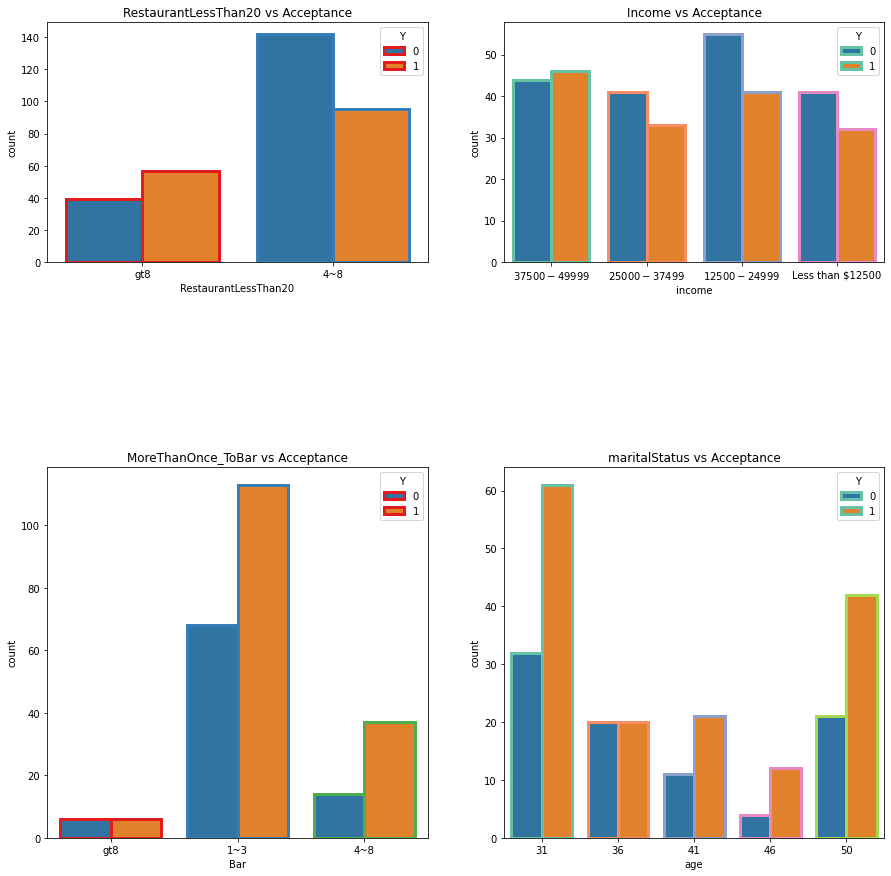

In [596]:
#Plots for above observations
plt.figure(figsize=(15,15))
plt.subplot(223)
plt.title("MoreThanOnce_ToBar vs Acceptance")
sns.countplot("Bar",hue="Y", data = MoreThanOnce_ToBar_AgeGt30,
                   linewidth=3,
                   edgecolor=sns.color_palette("Set1"))
plt.subplot(224)
plt.title("maritalStatus vs Acceptance")
sns.countplot("age",hue="Y", data = MoreThanOnce_ToBar_AgeGt30,
                   linewidth=3,
                   edgecolor=sns.color_palette("Set2"))

plt.subplot(321)
plt.title("RestaurantLessThan20 vs Acceptance")
sns.countplot("RestaurantLessThan20",hue="Y", data = MoreThanOnce_ToCheapRes_IncomeLess50K,
                   linewidth=3,
                   edgecolor=sns.color_palette("Set1"))
plt.subplot(322)
plt.title("Income vs Acceptance")
sns.countplot("income",hue="Y", data = MoreThanOnce_ToCheapRes_IncomeLess50K,
                   linewidth=3,
                   edgecolor=sns.color_palette("Set2"))

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Text(0.5, 1.0, 'Correlation Heatmap')

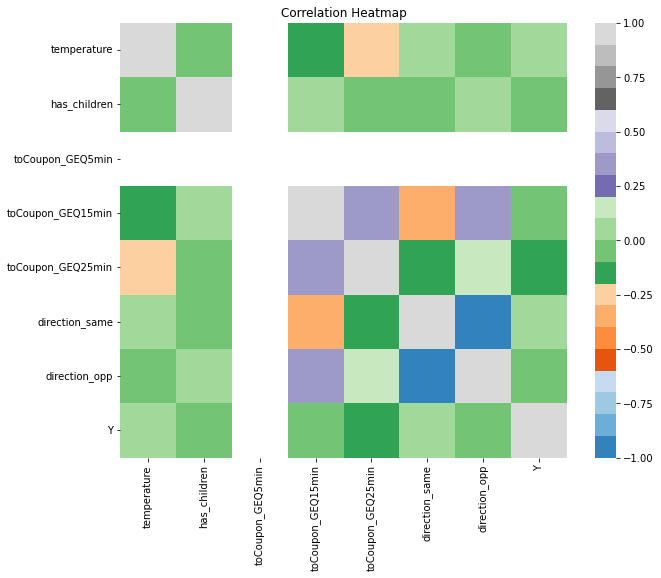

In [611]:
sns.heatmap(coupons_Data.corr(),cmap='tab20c')
plt.title("Correlation Heatmap")

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

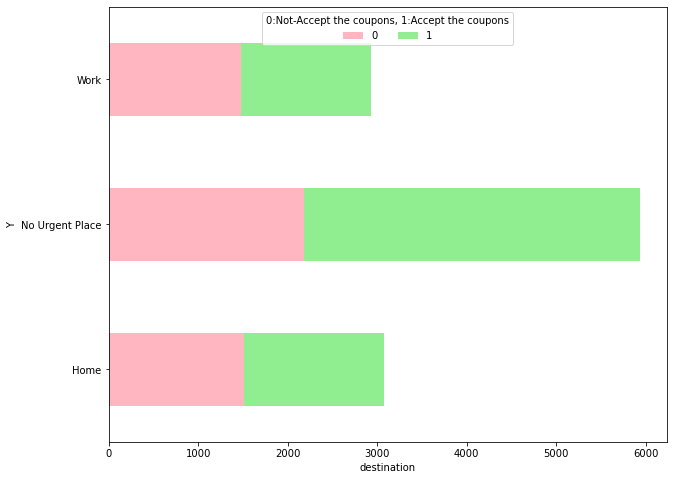

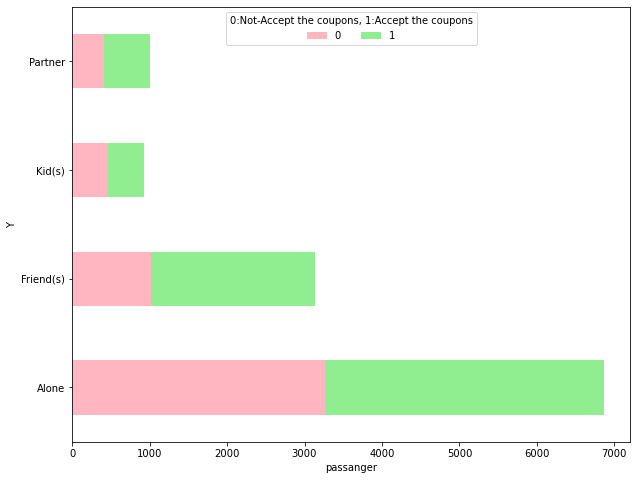

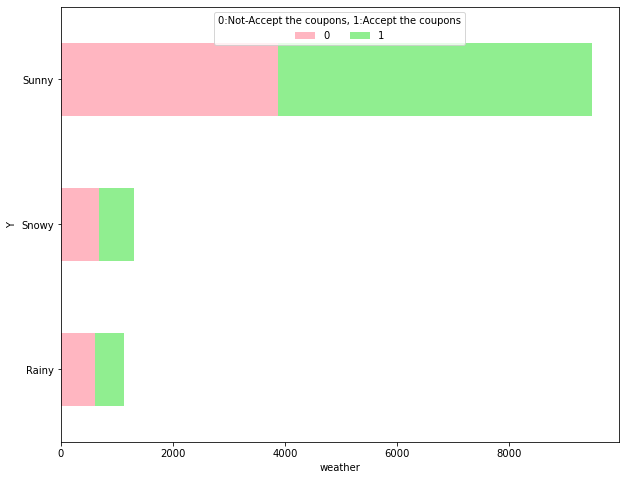

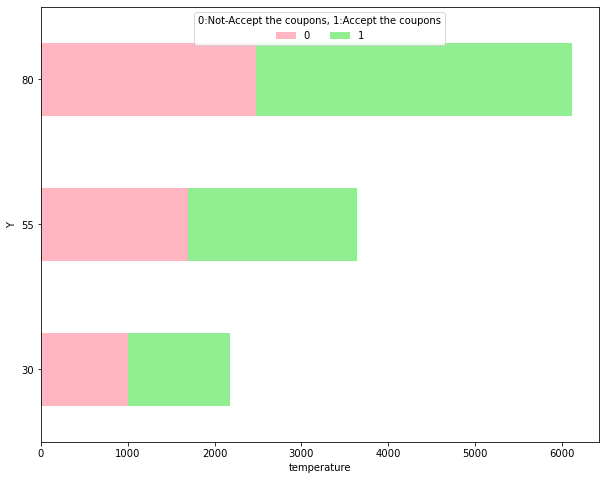

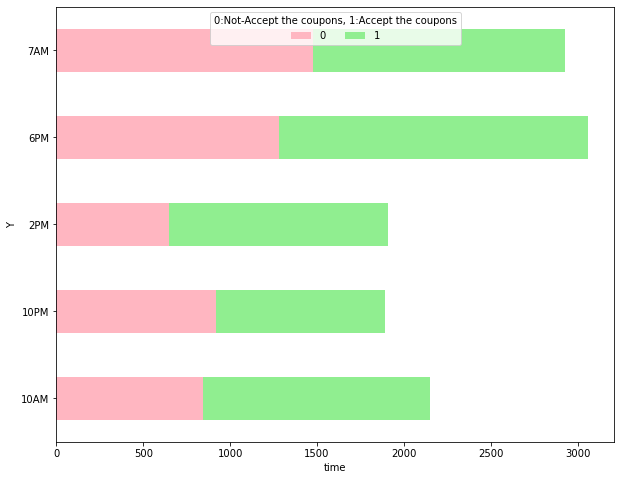

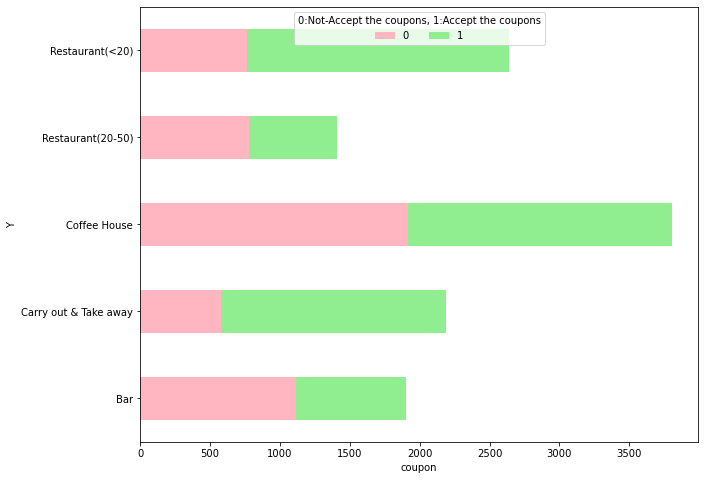

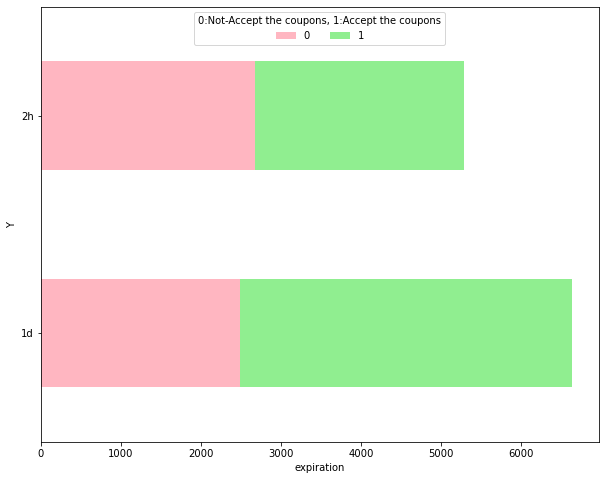

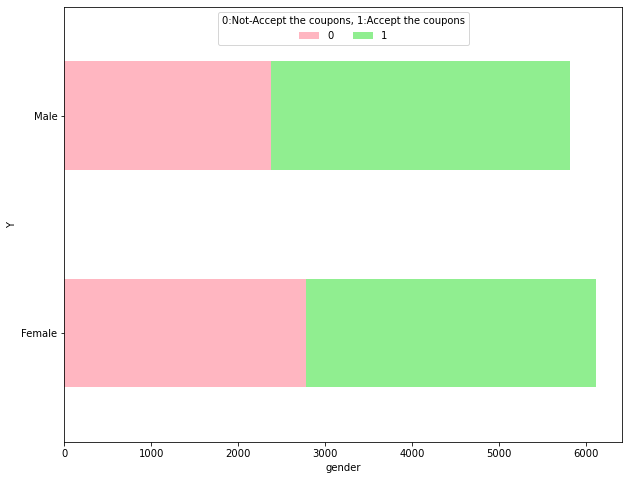

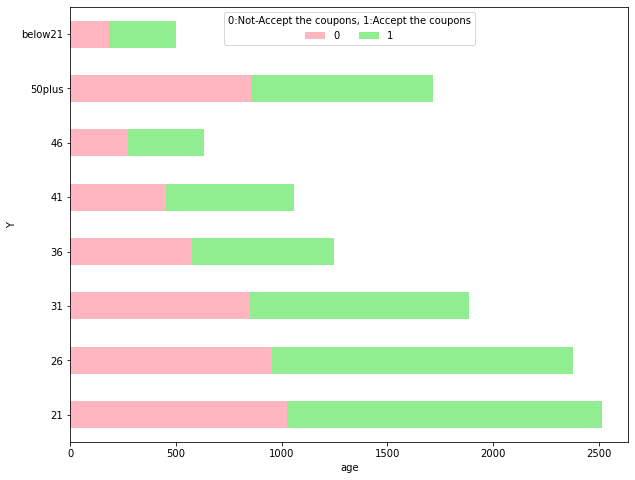

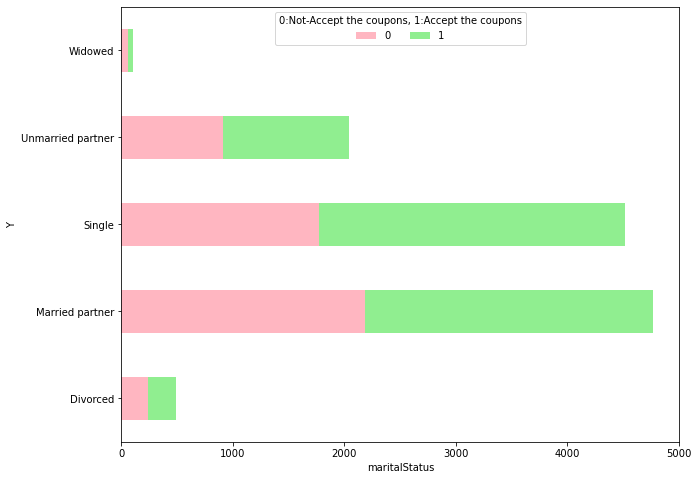

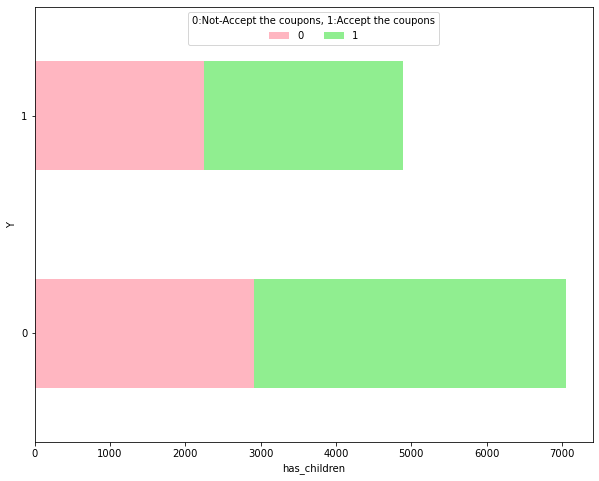

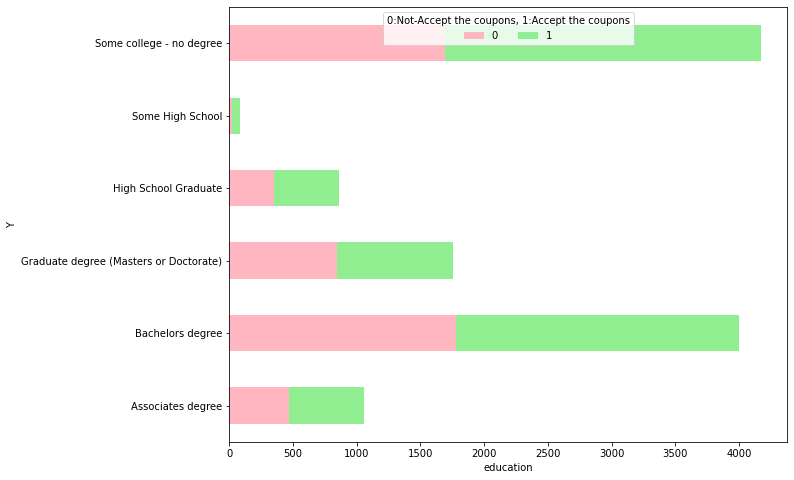

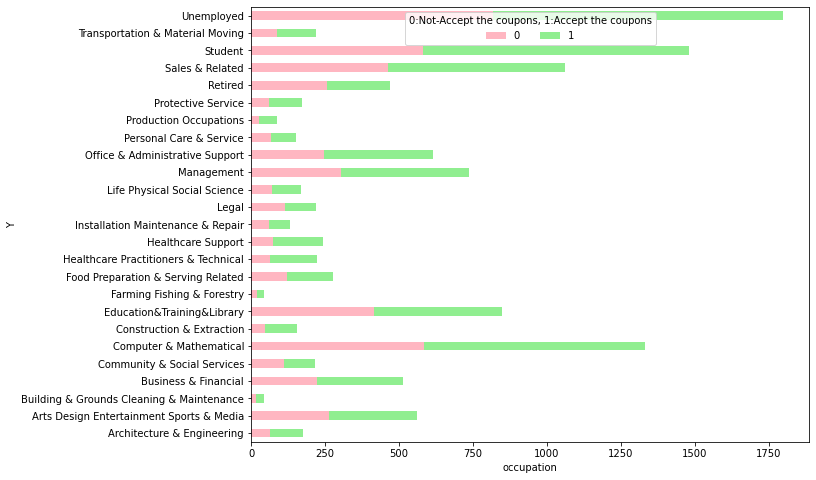

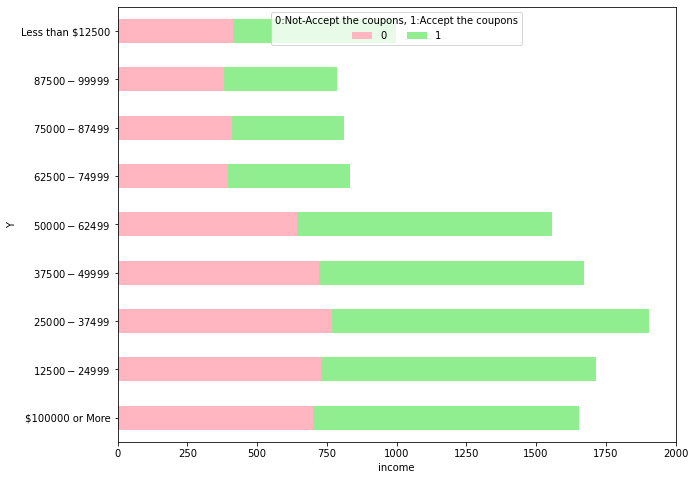

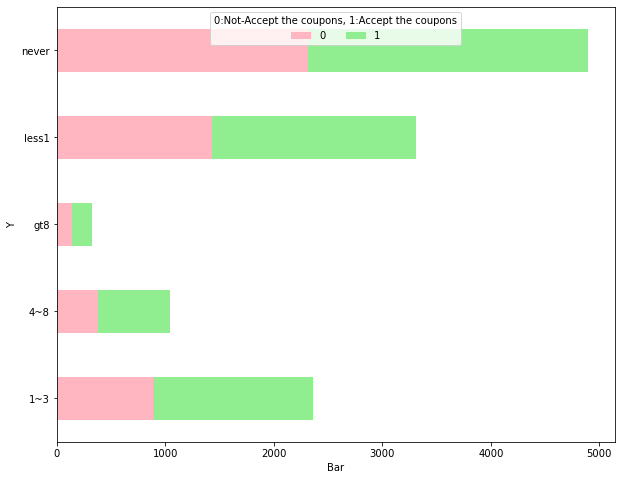

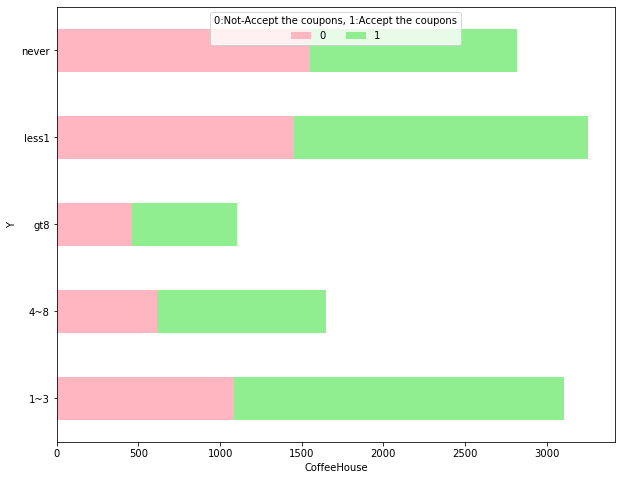

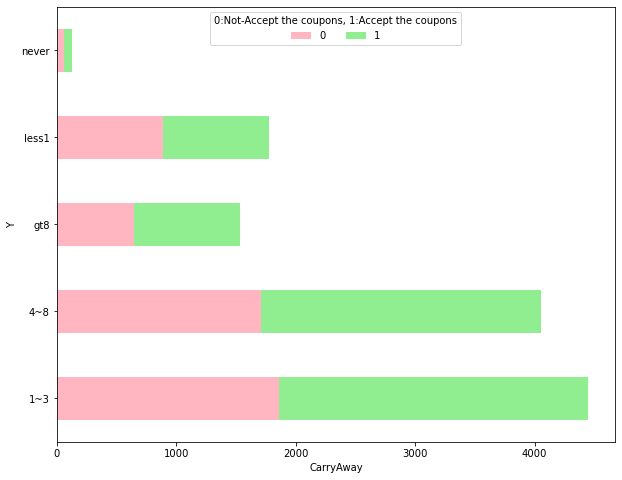

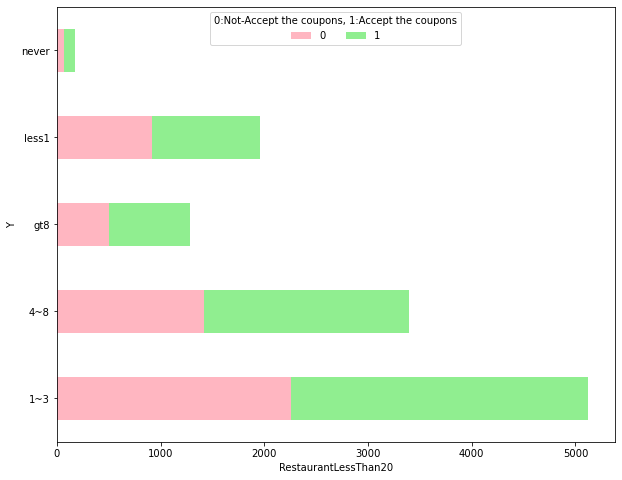

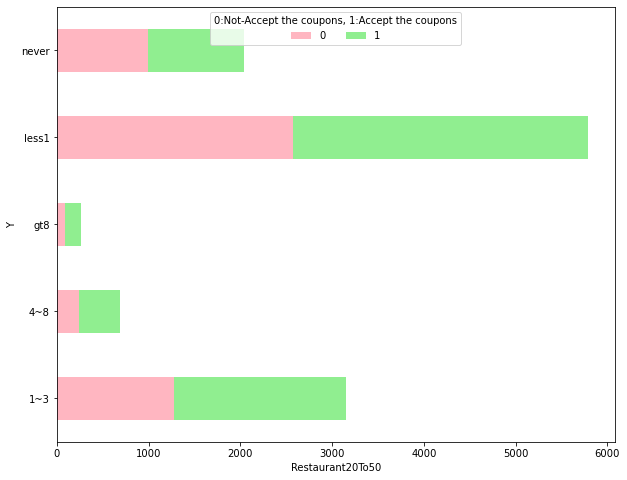

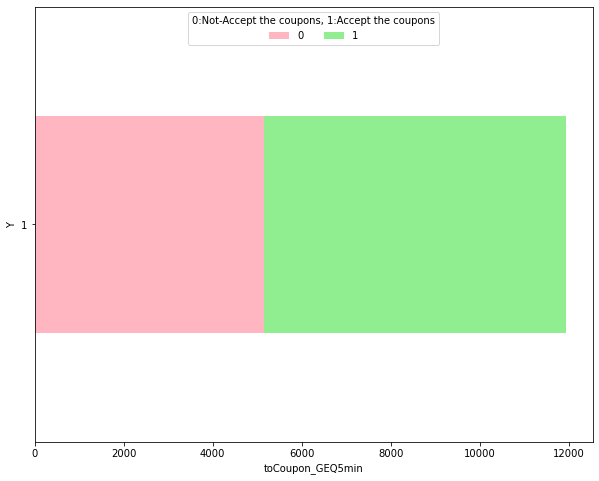

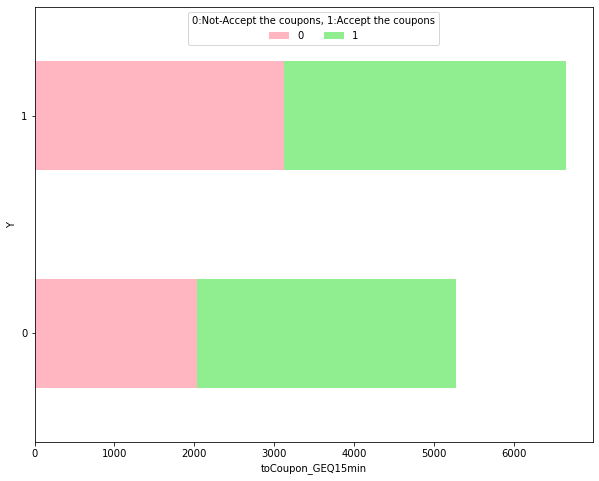

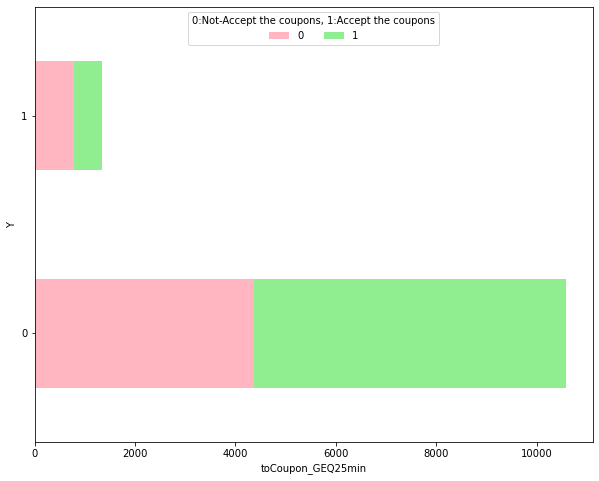

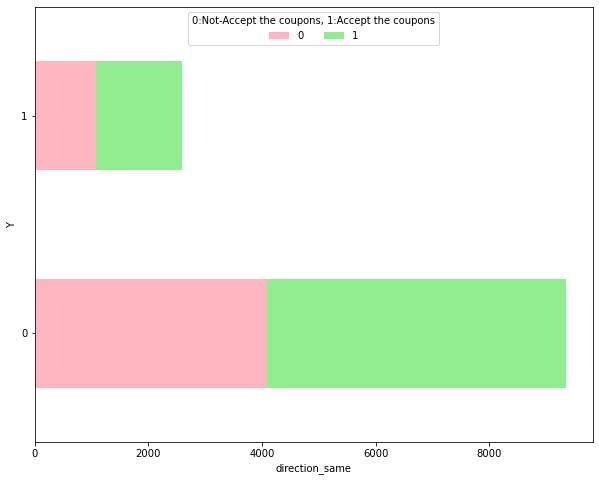

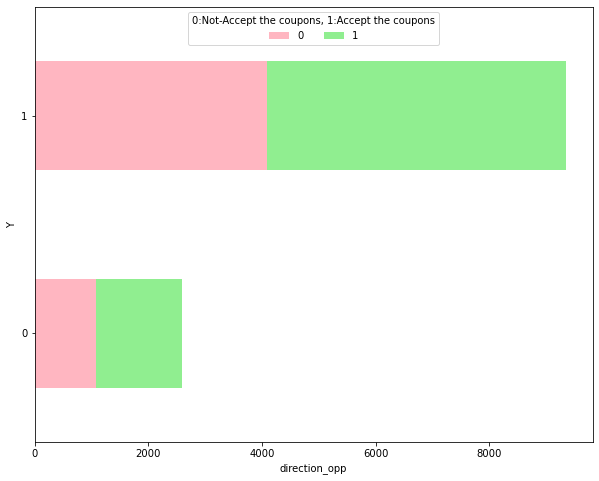

In [542]:
#How much percentage of customers accept the coupon (Green) vs Not Accept (Red) on different categories. 
for col in coupons_Data.drop('Y', axis=1).columns:
    plt.rcParams["figure.figsize"] = [10, 8]
    my_colors = (['lightpink', 'lightgreen'])
    plt.rcParams.update({'font.size': 10})
    pd.crosstab(coupons_Data[col], coupons_Data['Y']).plot(kind='barh',stacked=True,color=my_colors).legend(
    loc='upper center', ncol=4, title="0:Not-Accept the coupons, 1:Accept the coupons"
)
    plt.xlabel(col)
    plt.ylabel('Y')
    plt.show()


In [ ]:
plt.figure(figsize=(25,10))

# calculate and plot the acceptance rate among drivers who went to a bar 3 or fewer times a month
plt.subplot(121)
df_bar_coupon[df_bar_coupon['Bar'].isin(['never', '1~3', 'less1'])]['Y'].value_counts().sort_index().plot(
    kind='pie', autopct="%.1f%%", explode=[0.1,0.1], labels=['Declined','Accepted'], fontsize=14)
plt.ylabel("")
plt.title('Went to a bar 3 or fewer times a month\n', fontsize=17)

# calculate and plot the acceptance rate among those who went more
plt.subplot(122)
df_bar_coupon[~(df_bar_coupon['Bar'].isin(['never', '1~3', 'less1']))]['Y'].value_counts().sort_index().plot(
    kind='pie', autopct="%.1f%%", explode=[0.1,0.1], labels=['Declined','Accepted'], fontsize=14)
plt.ylabel("")
plt.title('Went to a bar more than 3 times a month\n', fontsize=17)

plt.suptitle('Acceptance Rates Between Different Groups of Drivers',fontsize=25,y=1.)

In [ ]:
plt.figure(figsize=(25,10))

# calculate and plot the acceptance rate among drivers who go to a bar more than once a month and are over the age of 25
plt.subplot(121)
df_bar_coupon[(df_bar_coupon['Bar'].isin(['1~3', 'gt8', '4~8'])) & 
              (df_bar_coupon['age'].isin(['46', '26', '31', '41', '50plus', '36']))]['Y'].value_counts().sort_index().plot(
    kind='pie', autopct="%.1f%%", explode=[0.1,0.1], labels=['Declined','Accepted'], fontsize=14)
plt.ylabel("")
plt.title('Go to a bar more than once a month and are over the age of 25\n', fontsize=17)

# calculate and plot the acceptance rate among all the others
plt.subplot(122)
df_bar_coupon[~((df_bar_coupon['Bar'].isin(['1~3', 'gt8', '4~8'])) & 
              (df_bar_coupon['age'].isin(['46', '26', '31', '41', '50plus', '36'])))]['Y'].value_counts().sort_index().plot(
    kind='pie', autopct="%.1f%%", explode=[0.1,0.1], labels=['Declined','Accepted'], fontsize=14)
plt.ylabel("")
plt.title('All the others\n', fontsize=17)

plt.suptitle('Acceptance Rates Between Different Groups of Drivers',fontsize=25,y=1.)

In [ ]:
plt.figure(figsize=(25,10))

# calculate and plot the acceptance rate among drivers who go to bars more than once a month and 
# had passengers that were not a kid and had occupations other than farming, fishing, or forestry
plt.subplot(121)
df_bar_coupon[(df_bar_coupon['Bar'].isin(['1~3', 'gt8', '4~8'])) & 
              (~df_bar_coupon['passanger'].isin(['Kid(s)'])) &
              (~df_bar_coupon['occupation'].isin(['Farming Fishing & Forestry']))]['Y'].value_counts().sort_index().plot(
    kind='pie', autopct="%.1f%%", explode=[0.1,0.1], labels=['Declined','Accepted'], fontsize=14)
plt.ylabel("")
plt.title('Go to bars more than once a month and had passengers that were\nnot a kid and had occupations other than farming, fishing, or forestry\n', fontsize=17)

# calculate and plot the acceptance rate among all the others
plt.subplot(122)
df_bar_coupon[~((df_bar_coupon['Bar'].isin(['1~3', 'gt8', '4~8'])) & 
              (~df_bar_coupon['passanger'].isin(['Kid(s)'])) &
              (~df_bar_coupon['occupation'].isin(['Farming Fishing & Forestry'])))]['Y'].value_counts().sort_index().plot(
    kind='pie', autopct="%.1f%%", explode=[0.1,0.1], labels=['Declined','Accepted'], fontsize=14)
plt.ylabel("")
plt.title('All the others\n', fontsize=17)

plt.suptitle('Acceptance Rates Between Different Groups of Drivers',fontsize=25,y=1.06)

In [ ]:
plt.figure(figsize=(25,10))

# calculate and plot the acceptance rate among drivers who go to bars more than once a month, 
# had passengers that were not a kid, and were not widowed
plt.subplot(131)
df_bar_coupon[(df_bar_coupon['Bar'].isin(['1~3', 'gt8', '4~8'])) & 
              (~df_bar_coupon['passanger'].isin(['Kid(s)'])) &
              (~df_bar_coupon['maritalStatus'].isin(['Widowed']))]['Y'].value_counts().sort_index().plot(
    kind='pie', autopct="%.1f%%", explode=[0.1,0.1], labels=['Declined','Accepted'], fontsize=14)
plt.ylabel("")
plt.title('Go to bars more than once a month,\nhad passengers that were not a kid,\nand were not widowed\n', fontsize=17)

# calculate and plot the acceptance rate among drivers who go to bars more than once a month and are under the age of 30
plt.subplot(132)
df_bar_coupon[(df_bar_coupon['Bar'].isin(['1~3', 'gt8', '4~8'])) & 
              (df_bar_coupon['age'].isin(['21', '26', 'below21']))]['Y'].value_counts().sort_index().plot(
    kind='pie', autopct="%.1f%%", explode=[0.1,0.1], labels=['Declined','Accepted'], fontsize=14)
plt.ylabel("")
plt.title('Go to bars more than\nonce a month and are\nunder the age of 30\n', fontsize=17)

# calculate and plot the acceptance rate among drivers who go to cheap restaurants more than 4 times a month and income is less than 50K
plt.subplot(133)
df_bar_coupon[(df_bar_coupon['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & 
              (df_bar_coupon['income'].isin(['$37500 - $49999', '$12500 - $24999','$25000 - $37499', 
                                             'Less than $12500']))]['Y'].value_counts().sort_index().plot(
    kind='pie', autopct="%.1f%%", explode=[0.1,0.1], labels=['Declined','Accepted'], fontsize=14)
plt.ylabel("")
plt.title('Go to cheap restaurants more\nthan 4 times a month and\nincome is less than 50K\n', fontsize=17)

plt.suptitle('Acceptance Rates Between Different Groups of Drivers',fontsize=25)